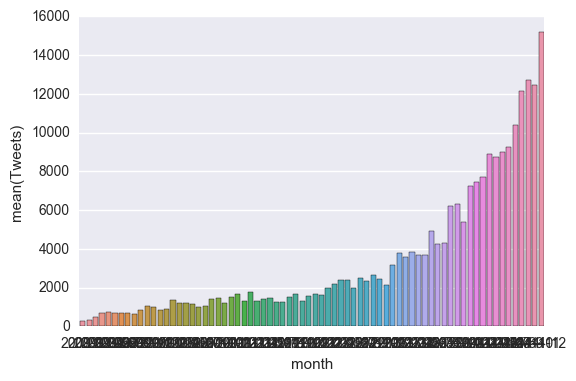

In [1]:
import pyes
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("darkgrid")
from datetime import datetime
from calendar import monthrange
%matplotlib inline

conn = pyes.es.ES(server=[('http', 'localhost', 9200)])
Year_Month = []
MonthTweets = []

def queryResult(Sfrom, Sto, Y, M):
    q = pyes.query.BoolQuery()
    ESR = pyes.ESRange(field="created_at", from_value=Sfrom, to_value=Sto, include_lower=True ,include_upper=True)
    q.add_must(pyes.query.RangeQuery(qrange=ESR))
    result = None
    result = conn.search(query=q , indices='twitter2' , doc_types='tweet') 
    YM = [Y, M]
    Year_Month.append('-'.join(str(v) for v in YM))
    MonthTweets.append(len(result))

def DateConvert(s):
    date_object = datetime.strptime(s, '%Y %m %d %X')
    dt_str = date_object.ctime() #
    dt_list = dt_str.split() 
    dt_list.insert(4, '+0000') 
    dt_result = ' '.join(dt_list) 
    return dt_result 

for y in range(2009, 2015):
    for m in range(1, 13):
        dt_from = [y, m, '1', '00:00:00']
        dt_to = [y, m, monthrange(y, m)[1], '23:59:59']
        Sdt_from = DateConvert(' '.join(str(v) for v in dt_from))
        Sdt_to = DateConvert(' '.join(str(v) for v in dt_to))
        queryResult(Sdt_from, Sdt_to, y, m)

s0 = pd.Series(Year_Month, name = 'month')
s1 = pd.Series(MonthTweets, name = 'Tweets')
GResult = pd.concat([s0, s1], axis=1)

sb.barplot(x='month', y='Tweets', order=Year_Month, data=GResult)